<a href="https://colab.research.google.com/github/yutianma1802/master-thesis/blob/main/control_experiment_NADH_vs_NAD%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

file_path = '/content/hPNMT raw data.xlsx'
df = pd.read_excel(file_path)

# Display the first 5 rows of the DataFrame
display(df.head())

,Measurement 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98
0,Cycle Nr.,Time [s],Temp. [°C],A1,A2,A3,A4,A5,A6,A7,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
1,1,0,24.6,0.7075,0.7318,0.7293,0.7517,0.7177,0.7429,0.7545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,60.013,24.5,0.7064,0.727,0.7256,0.7456,0.7124,0.7351,0.7459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,120.035,24.6,0.702,0.7222,0.721,0.7395,0.7066,0.7306,0.7409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,180.045,24.5,0.6993,0.7195,0.7195,0.7362,0.703,0.7268,0.7371,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
import pandas as pd

file_path = '/content/hPNMT raw data.xlsx'

# Read the Excel file, using the second row (index 1) as the header
df = pd.read_excel(file_path, header=1)

# Select the specified columns for NADH with enzyme, and NAD+ with enzyme
selected_columns = ['A1', 'A2', 'A3', 'E1', 'E2', 'E3']
df_selected = df[selected_columns]

# Display the selected columns
display(df_selected.head())

,A1,A2,A3,E1,E2,E3
0,0.7075,0.7318,0.7293,0.2012,0.2043,0.1998
1,0.7064,0.7270,0.7256,0.2015,0.2041,0.2010
2,0.7020,0.7222,0.7210,0.2008,0.2040,0.2013
3,0.6993,0.7195,0.7195,0.2002,0.2032,0.2010
4,0.6961,0.7171,0.7159,0.2001,0.2024,0.2013


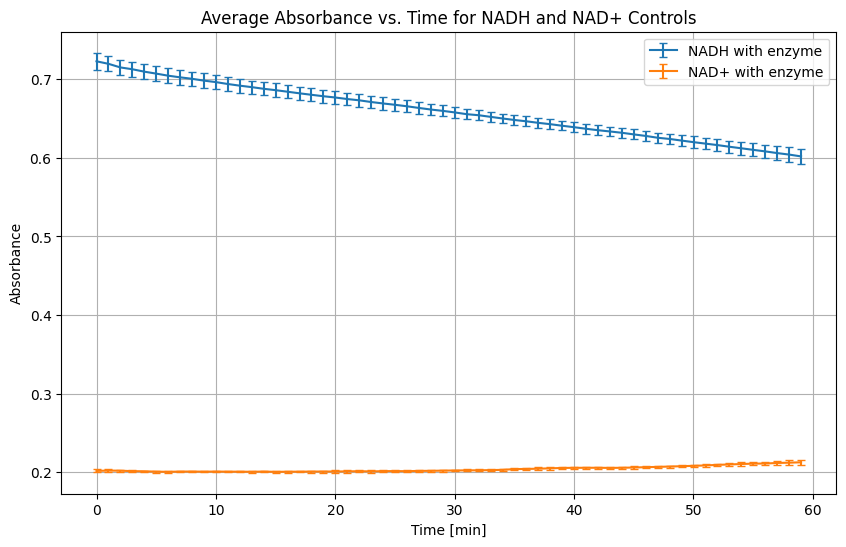

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Select the specified columns and create a copy
df_selected = df_selected[['A1', 'A2', 'A3', 'E1', 'E2', 'E3']].copy()

# Calculate the average and standard deviation of A1, A2, and A3 (NADH with enzyme)
df_selected['A_average'] = df_selected[['A1', 'A2', 'A3']].mean(axis=1)
df_selected['A_std'] = df_selected[['A1', 'A2', 'A3']].std(axis=1, ddof=0)


# Calculate the average and standard deviation of E1, E2, and E3 (NAD+ without enzyme)
df_selected['E_average'] = df_selected[['E1', 'E2', 'E3']].mean(axis=1)
df_selected['E_std'] = df_selected[['E1', 'E2', 'E3']].std(axis=1, ddof=0)

# Ensure 'Time [s]' is in a numeric format, coercing errors
df['Time [s]'] = pd.to_numeric(df['Time [s]'], errors='coerce')

# Convert Time from seconds to minutes
df['Time [min]'] = df['Time [s]'] / 60

# Plot the average absorbance for A and E columns against time in minutes with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(df['Time [min]'], df_selected['A_average'], yerr=df_selected['A_std'], label='NADH with enzyme', capsize=3)
plt.errorbar(df['Time [min]'], df_selected['E_average'], yerr=df_selected['E_std'], label='NAD+ with enzyme', capsize=3)


plt.xlabel('Time [min]')
plt.ylabel('Absorbance')
plt.title('Average Absorbance vs. Time for NADH and NAD+ Controls')
plt.legend()
plt.grid(True)
plt.show()